In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

In [10]:
files = [
    ('TensorSketch', '../tensorboard_logs/ts/events.out.tfevents.1643020573.59855f0ffeed'),
    ('TensorSRHT', '../tensorboard_logs/srht/events.out.tfevents.1643021176.59855f0ffeed'),
    ('CtR-TensorSRHT', '../tensorboard_logs/srht_comp_real/events.out.tfevents.1643021475.59855f0ffeed')
]

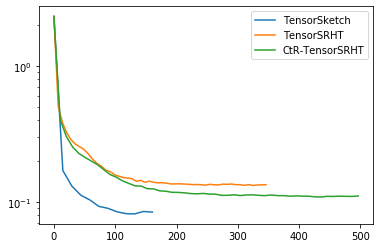

In [31]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('time_elapsed'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_mnll'))['value'].values
    
    plt.plot(times, losses, label=file[0])

plt.legend()
plt.yscale('log')
plt.show()

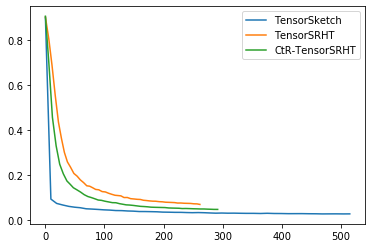

In [12]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    
    plt.plot(times, losses, label=file[0])

plt.legend()
# plt.yscale('log')
plt.show()

In [ ]:
# somehow convergence of tensorsrht is much slower! might be related to optimizer and learning rate...
# does learning rate depend on the sketch?

In [7]:
ea.Tags()

{'images': [],
 'audio': [],
 'histograms': ['q_mean'],
 'scalars': ['test_loss',
  'test_mnll',
  'test_kl',
  'test_error',
  'training_time',
  'train_loss',
  'train_mnll',
  'train_kl',
  'train_error',
  'feature_scale',
  'learning_rate',
  'kl_weight'],
 'distributions': ['q_mean'],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [14]:
ea.Scalars('test_error')

[ScalarEvent(wall_time=1643021475.7965705, step=0, value=0.9043999910354614),
 ScalarEvent(wall_time=1643021482.271253, step=1, value=0.6998999714851379),
 ScalarEvent(wall_time=1643021489.1895025, step=2, value=0.45559999346733093),
 ScalarEvent(wall_time=1643021496.2758996, step=3, value=0.3294999897480011),
 ScalarEvent(wall_time=1643021503.1217313, step=4, value=0.24770000576972961),
 ScalarEvent(wall_time=1643021509.9689975, step=5, value=0.2054000049829483),
 ScalarEvent(wall_time=1643021516.8257995, step=6, value=0.17350000143051147),
 ScalarEvent(wall_time=1643021522.9851587, step=7, value=0.1589999943971634),
 ScalarEvent(wall_time=1643021529.222074, step=8, value=0.14339999854564667),
 ScalarEvent(wall_time=1643021535.76152, step=9, value=0.13449999690055847),
 ScalarEvent(wall_time=1643021542.841001, step=10, value=0.12439999729394913),
 ScalarEvent(wall_time=1643021549.8856792, step=11, value=0.11270000040531158),
 ScalarEvent(wall_time=1643021556.8507063, step=12, value=0.